# Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [38]:
# Load data:
archive_path = "data/mseed"
archive_vs_file = "archive"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(archive_path, starttime, endtime)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 50.0]
st = load_wfs_obj.read_waveform_data()

<IPython.core.display.Javascript object>


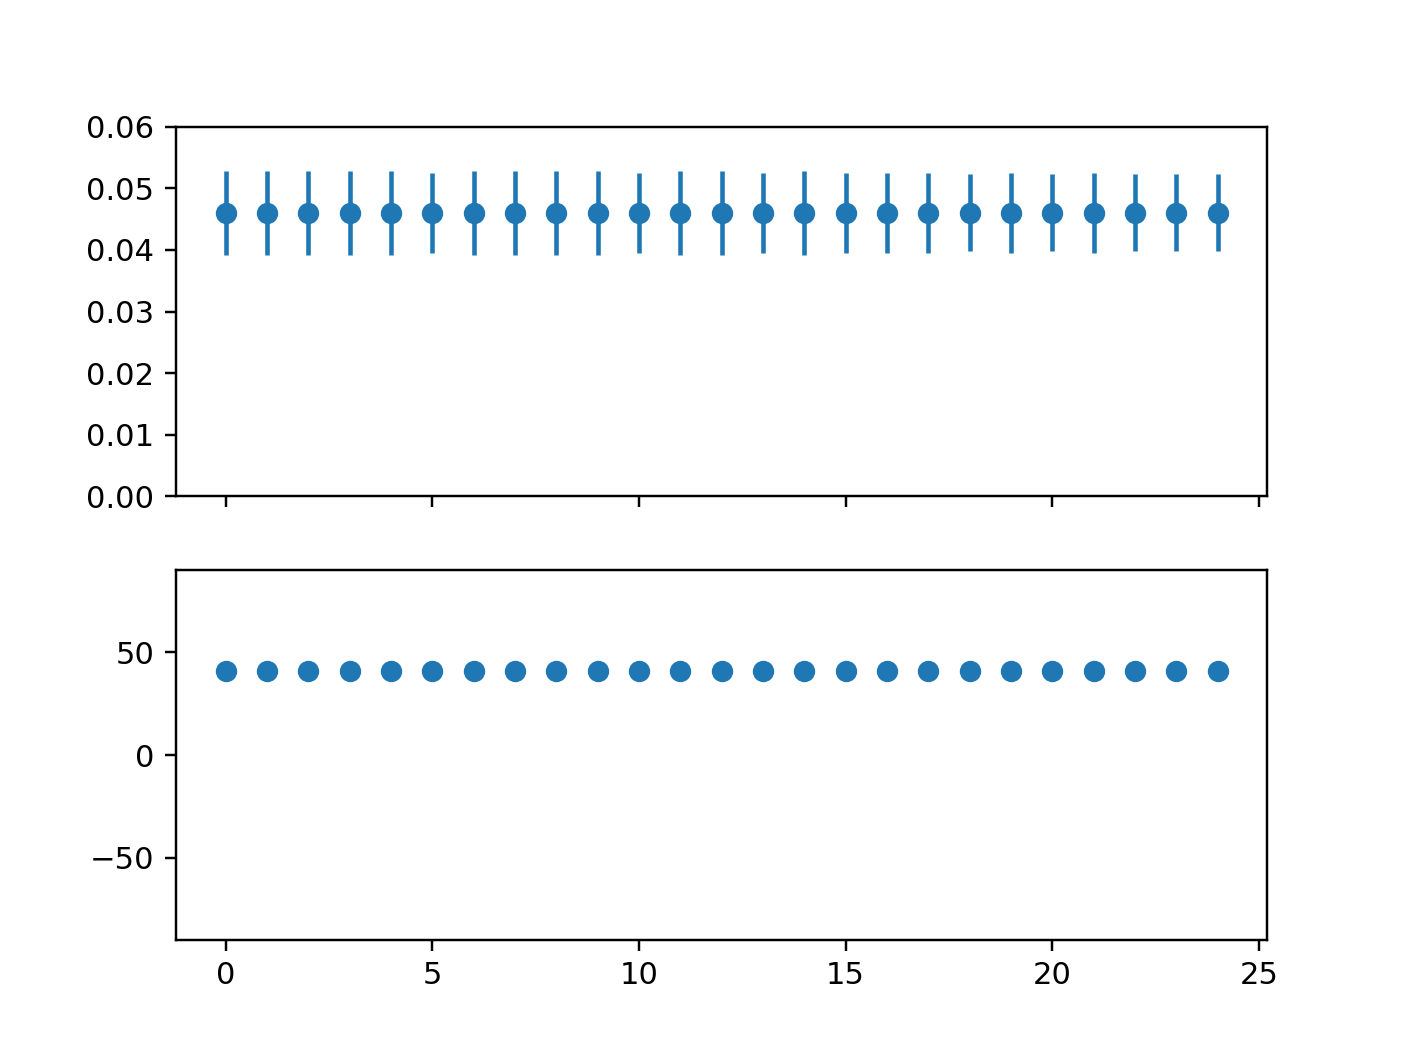

<IPython.core.display.Javascript object>


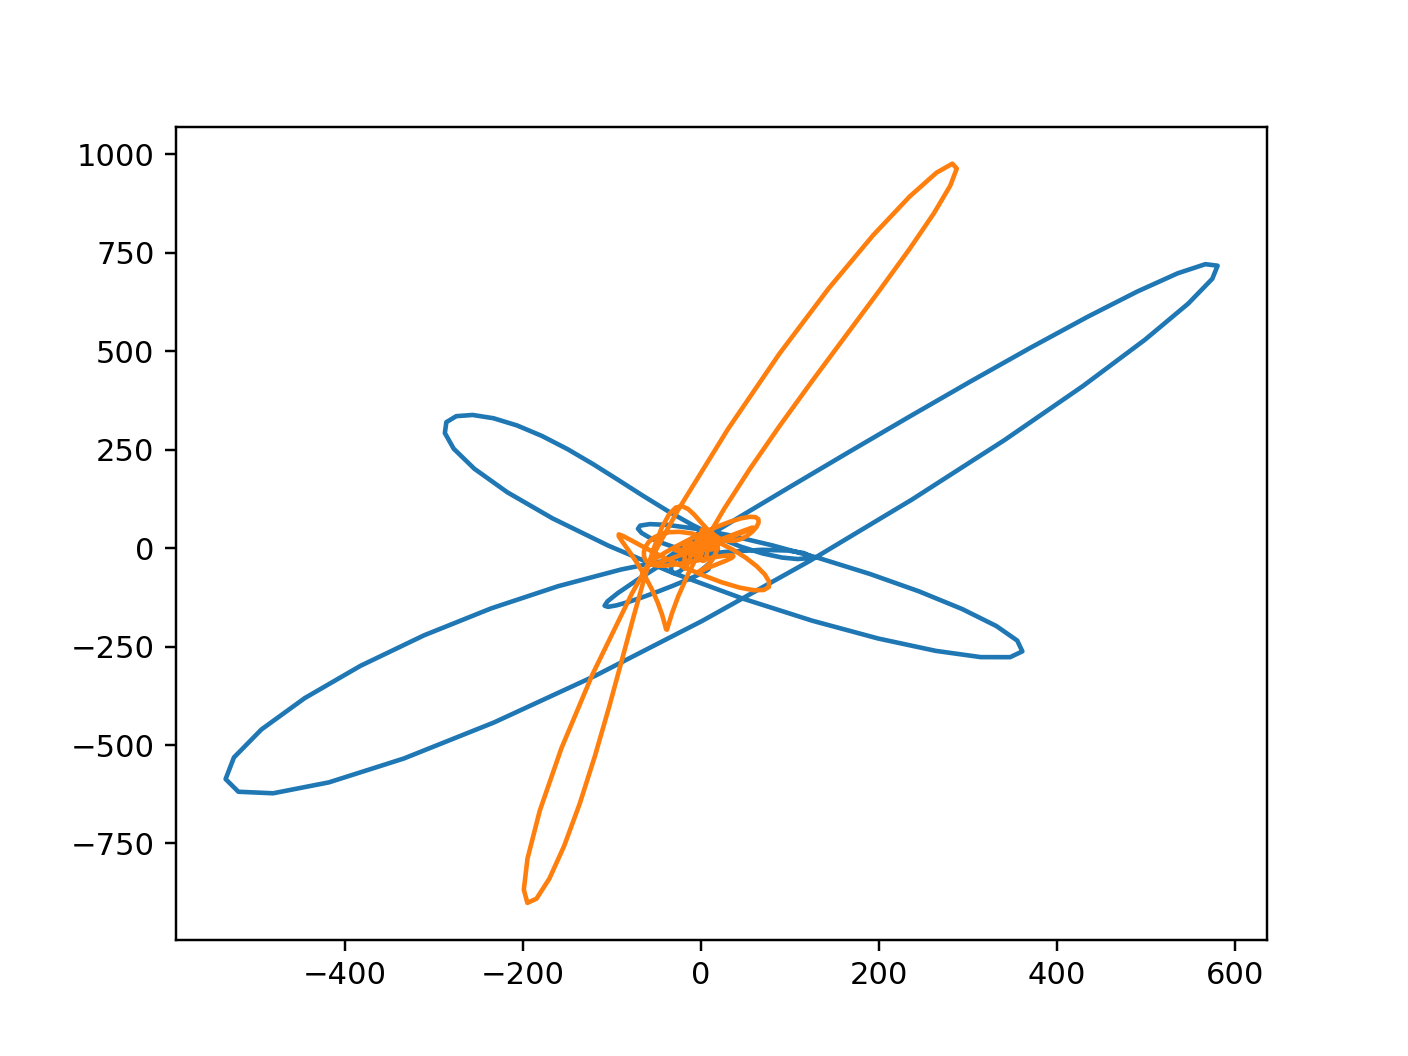

<IPython.core.display.Javascript object>


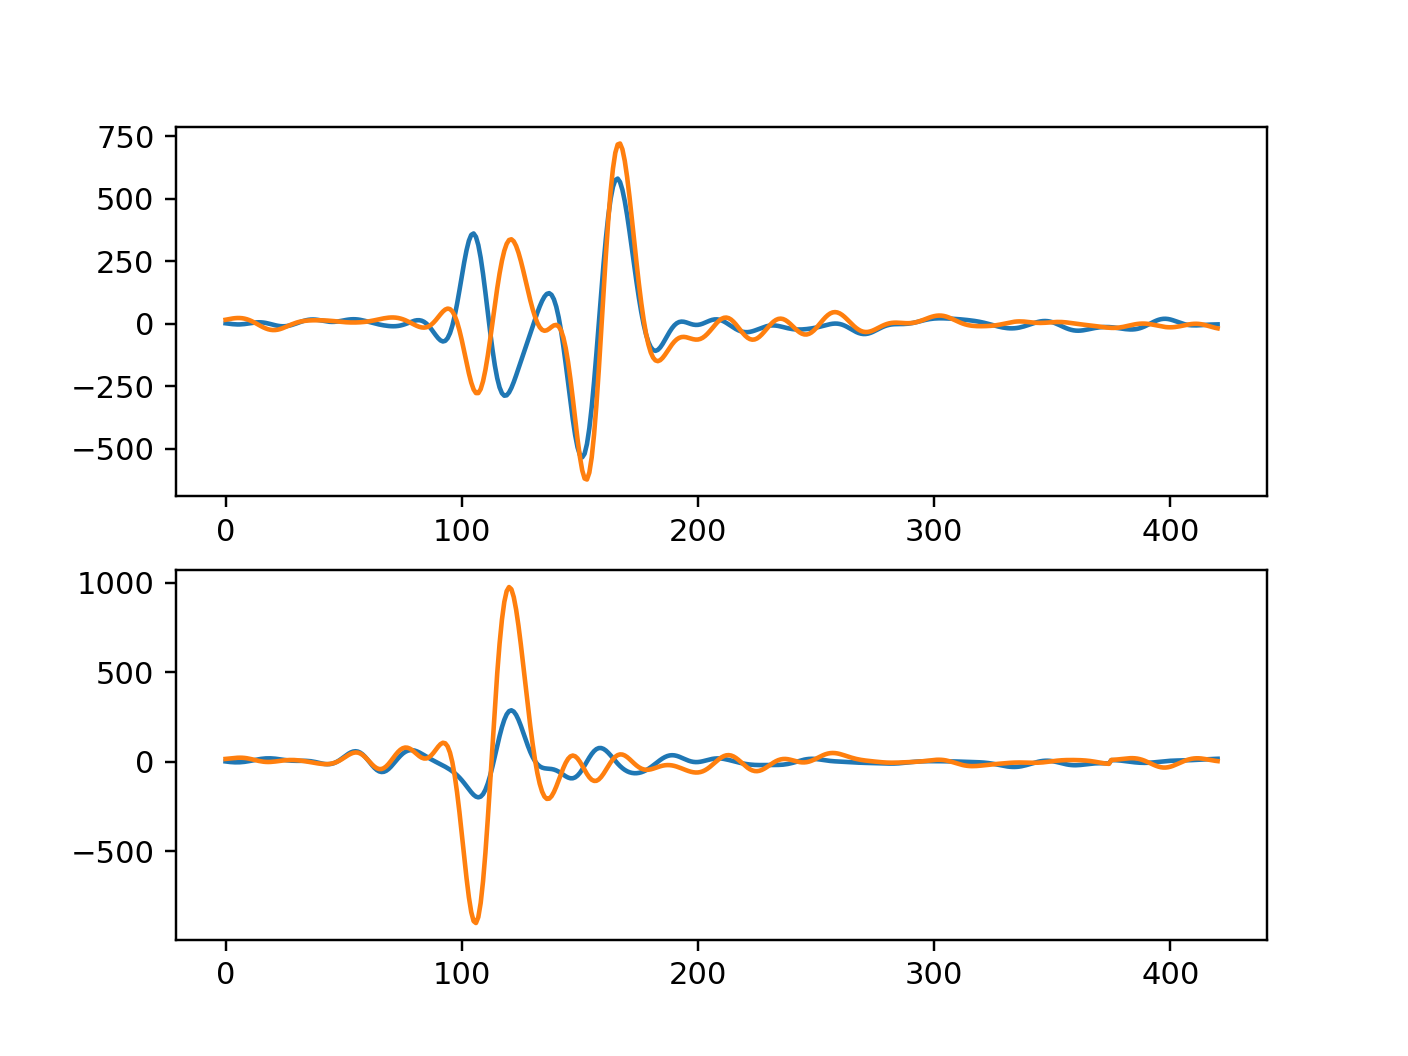

<IPython.core.display.Javascript object>


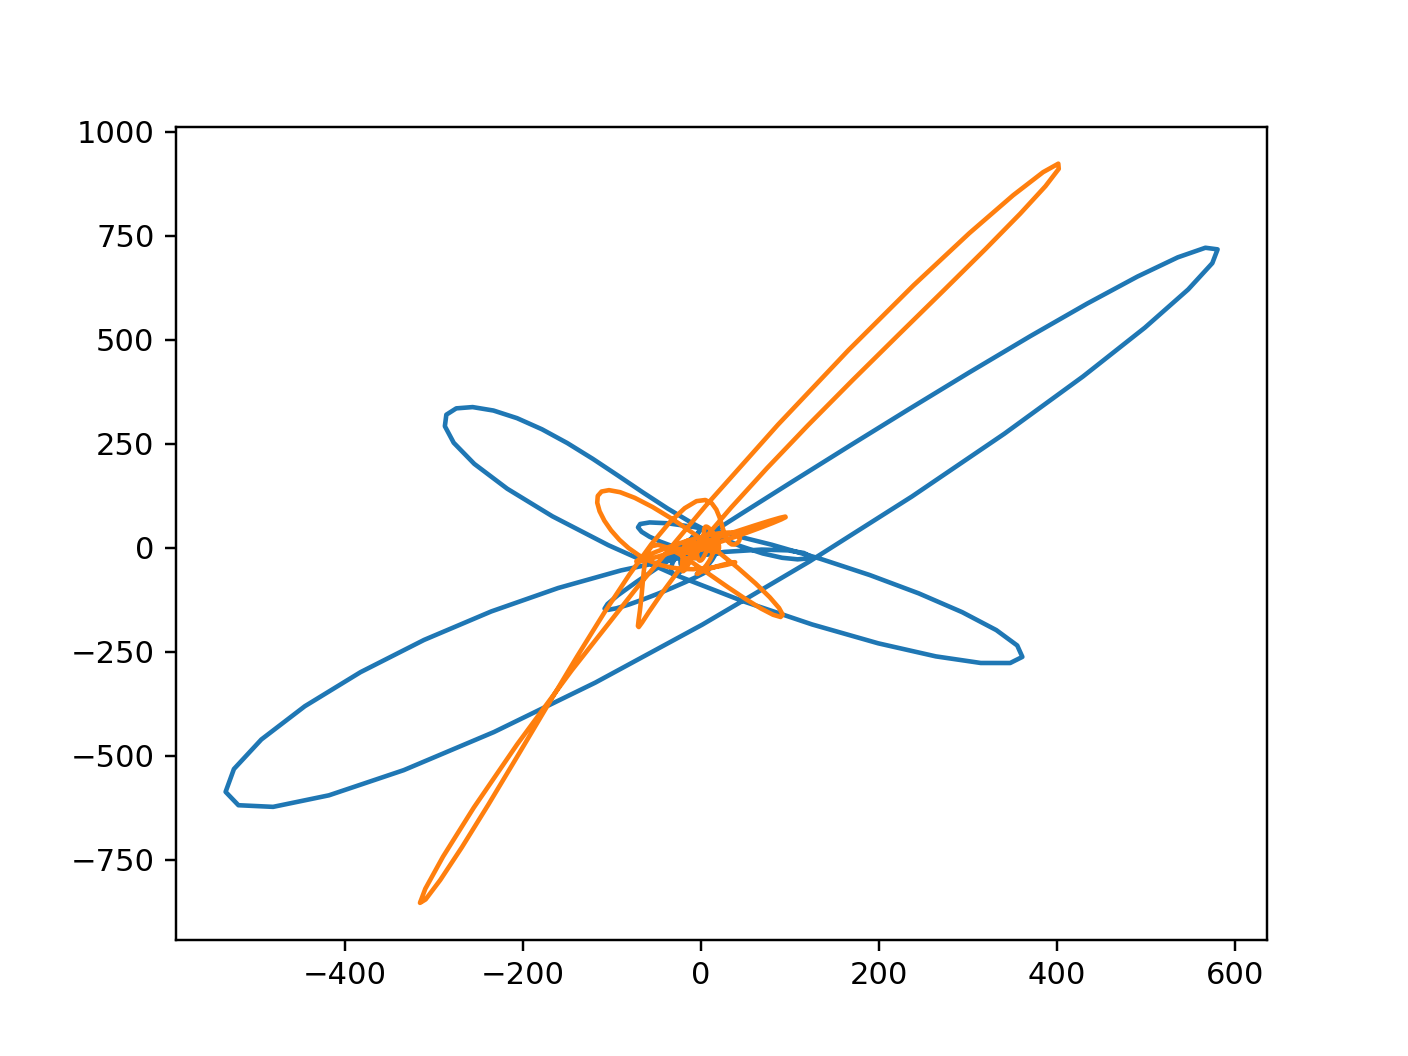

<IPython.core.display.Javascript object>


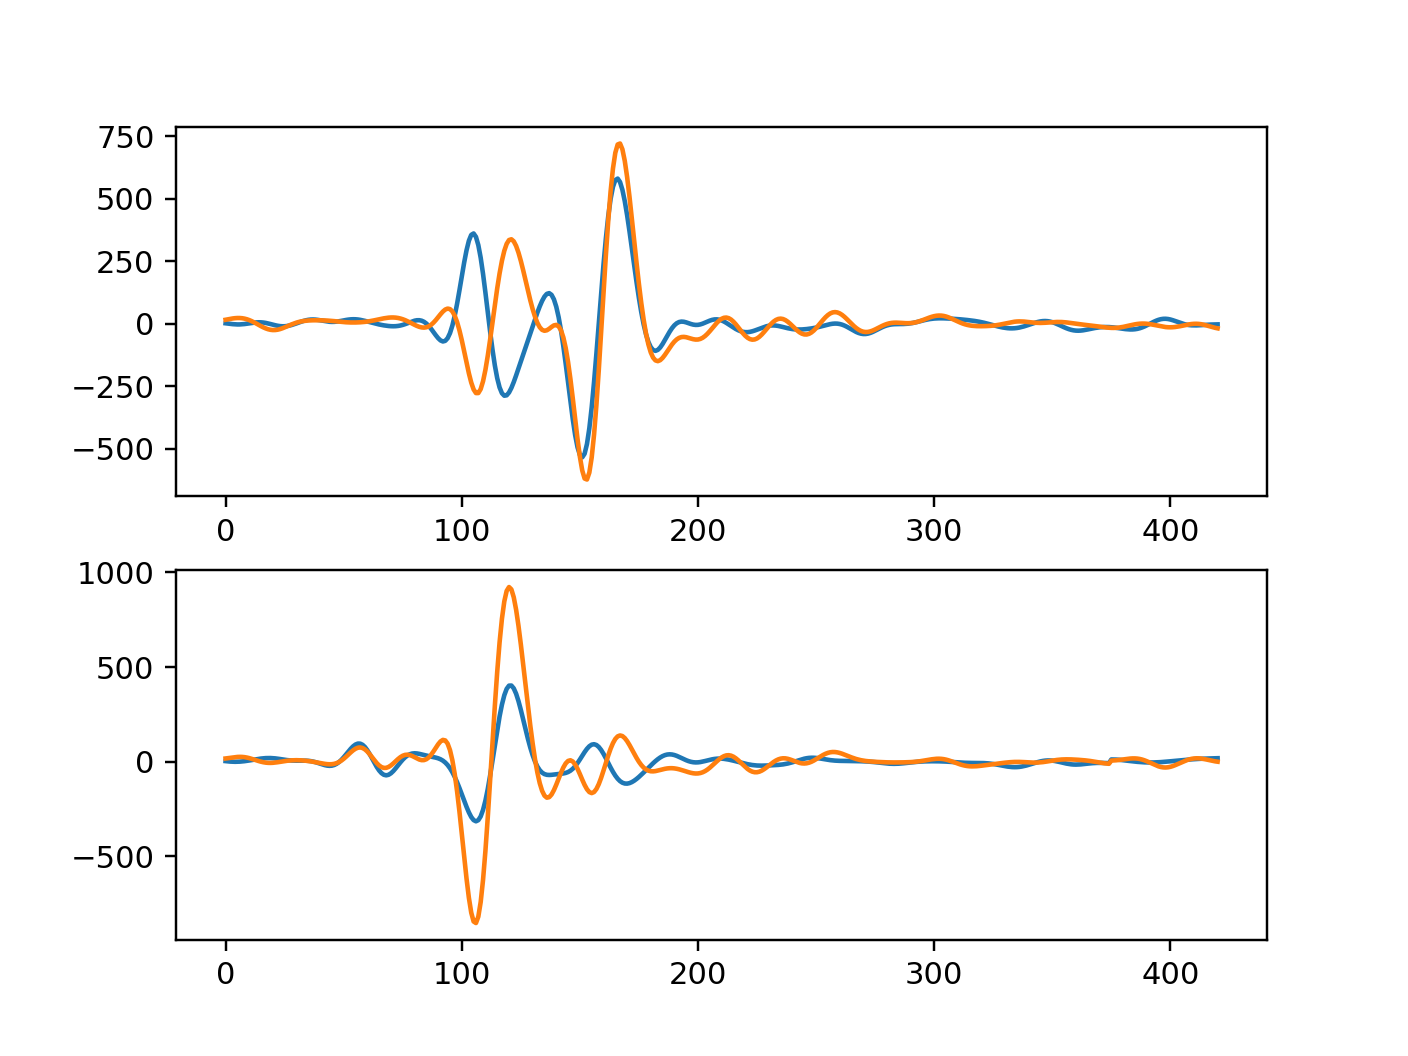

In [113]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.rotate_step_deg = 1.0 #2.5
splitting_event.max_t_shift_s = 0.12
splitting_event.n_win = 5 #10
# splitting_event.perform_sp
splitting_event.perform_sws_analysis()

In [95]:
# # splitting_event.perform_sws_analysis()

# data_arr_N = st.select(station="ST01", channel="??N")[0].data[1600:2000] #np.array([1., 0.7, 0.])
# data_arr_E = st.select(station="ST01", channel="??E")[0].data[1600:2000] #np.array([0., 0.7, 1.])
# rot_angle_rad = np.pi / 3.
# data_arr_N_rot, data_arr_E_rot = splitting_event.rotate_horizontal_comps(data_arr_N, data_arr_E, rot_angle_rad)

# plt.figure(figsize=(6,6))
# plt.plot(data_arr_E, data_arr_N)
# plt.plot(data_arr_E_rot, data_arr_N_rot)
# plt.show()

# plt.figure(figsize=(6,6))
# plt.plot(data_arr_N)
# plt.plot(data_arr_N_rot)
# plt.show()




<IPython.core.display.Javascript object>


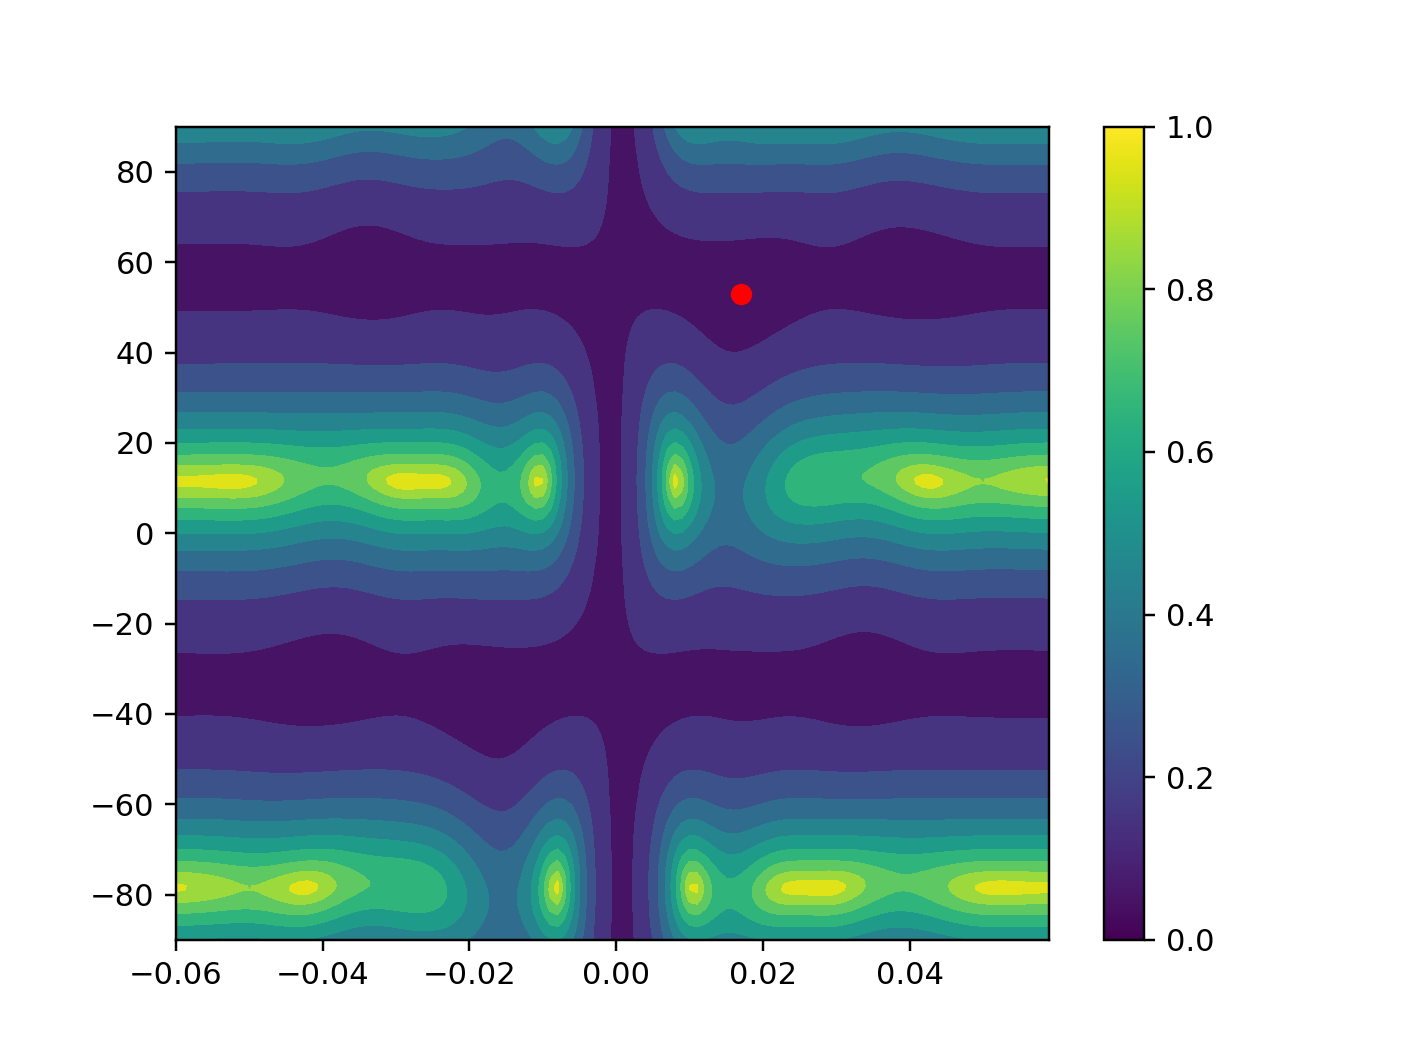

(array([77]), array([143])) (120, 181)
Best splitting result is:
phi =  53.0 degrees
dt =  0.017 s


In [96]:
plt.figure()
Y, X = np.meshgrid(splitting_event.phis_labels, splitting_event.lags_labels)
Z = np.average(splitting_event.grid_search_results_all_win, axis=0)
plt.contourf(X, Y, Z, levels=10)

min_idxs = np.where(Z == np.min(Z)) 
print(min_idxs, Z.shape)
plt.scatter(splitting_event.lags_labels[min_idxs[0]], splitting_event.phis_labels[min_idxs[1]], c='r')

plt.colorbar()
plt.show()

print("Best splitting result is:")
print("phi = ", splitting_event.phis_labels[min_idxs[1]][0], "degrees")
print("dt = ", splitting_event.lags_labels[min_idxs[0]][0], "s")

# from scipy import interpolate
# interp_spline = interpolate.RectBivariateSpline(splitting_event.lags_labels, splitting_event.phis_labels, np.average(splitting_event.grid_search_results_all_win, axis=0))
# x_tmp = splitting_event.lags_labels
# y_tmp = splitting_event.phis_labels
# Z2 = interp_spline(np.linspace(x_tmp[0], x_tmp[-1], 5*len(x_tmp)), np.linspace(y_tmp[0], y_tmp[-1], 5*len(y_tmp)))
# plt.figure()
# Y2, X2 = np.meshgrid(np.linspace(y_tmp[0], y_tmp[-1], 5*len(y_tmp)), np.linspace(x_tmp[0], x_tmp[-1], 5*len(x_tmp)))
# plt.contourf(X2, Y2, Z2, levels=10)
# plt.show()


In [ ]:
data_arr_N = st.select(station="ST01", channel="??N")[0].data[1600:2000] #np.array([1., 0.7, 0.])
data_arr_E = st.select(station="ST01", channel="??E")[0].data[1600:2000] #np.array([0., 0.7, 1.])
data = np.vstack((data_arr_E,data_arr_N))
np.sort(np.linalg.eigvalsh(np.cov(data)))

(120, 181)

(120,)